In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

In [2]:
VDDT = pd.read_csv('/Users/aaron/CSC/Volunteer Day Post-Survey (Responses) - DT.csv')

In [3]:
VDDT.head()


,How likely are you to participate in Volunteer Day again?,Overall satisfaction with your site (volunteer experience specifically with your site),"Did your site experience any logistical issues (finding work, receiving help, etc)",How many hours of volunteering did you do?,How effective were the pre-session and post-session briefings?,How much help did you receive volunteering?,How fulfilling was your volunteering experience?,How impactful do you think your voulunteer work was?
0,yes,5,No,2.5,3,5,4,4
1,yes,5,No,3.0,3,4,5,4
2,yes,5,No,3.0,5,2,5,5
3,no,3,No,3.0,1,3,3,2
4,yes,5,No,3.0,1,1,5,5


In [4]:
encoded_df = pd.get_dummies(VDDT, columns=['Did your site experience any logistical issues (finding work, receiving help, etc)'])


In [5]:
encoded_df = encoded_df.drop(['How fulfilling was your volunteering experience?'], axis = 1)

In [6]:
encoded_df

,How likely are you to participate in Volunteer Day again?,Overall satisfaction with your site (volunteer experience specifically with your site),How many hours of volunteering did you do?,How effective were the pre-session and post-session briefings?,How much help did you receive volunteering?,How impactful do you think your voulunteer work was?,"Did your site experience any logistical issues (finding work, receiving help, etc)_No","Did your site experience any logistical issues (finding work, receiving help, etc)_Yes"
0,yes,5,2.5,3,5,4,1,0
1,yes,5,3.0,3,4,4,1,0
2,yes,5,3.0,5,2,5,1,0
3,no,3,3.0,1,3,2,1,0
4,yes,5,3.0,1,1,5,1,0
5,no,1,2.0,1,1,2,0,1
6,yes,4,3.0,3,1,3,0,1
7,yes,5,4.0,3,5,5,1,0
8,yes,5,2.0,2,4,4,1,0
9,yes,4,1.5,4,3,4,1,0


In [7]:
X = encoded_df.values[:, 1:]
y = encoded_df.values[:, 0]

In [8]:
X.shape

(43, 7)

In [9]:
y


array(['yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'yes'], dtype=object)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test



In [11]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 2, min_samples_split = 5)

In [12]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=5,
                       random_state=0)

In [13]:
y_pred = clf_entropy.predict(X_test)

In [14]:
print("accuracy is: ", accuracy_score(y_test, y_pred))

accuracy is:  0.8461538461538461


In [15]:
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes'], dtype=object)

In [16]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [17]:
from sklearn.tree import plot_tree


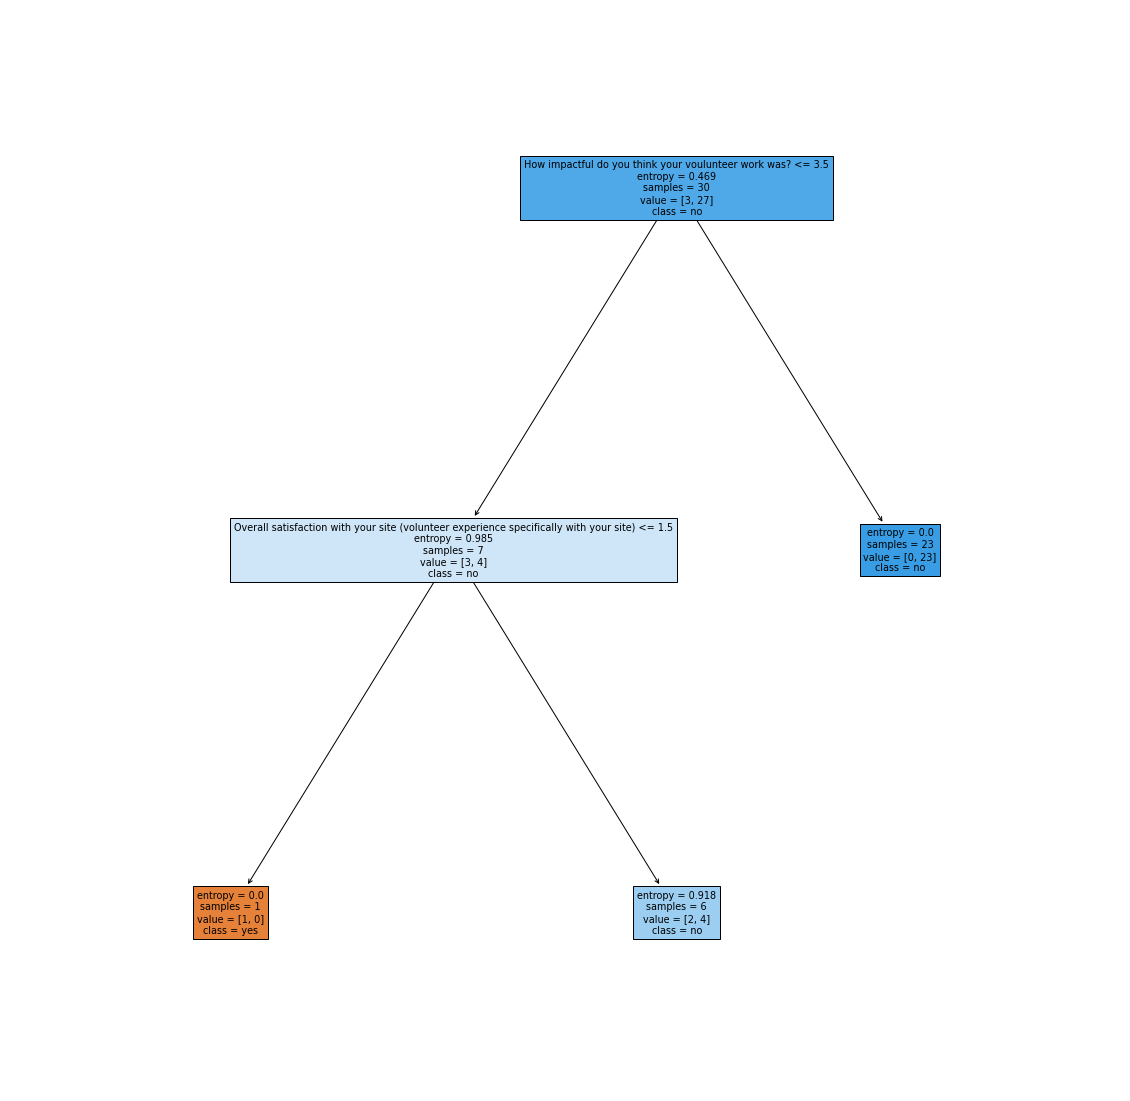

In [18]:
plt.figure(figsize = (20, 20))
plot_tree(clf_entropy, filled=True, feature_names=encoded_df.columns[1:10].values.tolist(), class_names = ["yes", "no"])
plt.show()

In [19]:
encoded_df.columns[0]

'How likely are you to participate in Volunteer Day again?'